# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.

##### VARIABLES
<table>
  <tr>
    <th>Nombre de la columna</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>PassengerId</td>
    <td>Identificador del pasajero. Único por cada pasajero.</td>
  </tr>
  <tr>
    <td>Survived</td>
    <td>Indica 1 si el pasajero sobrevivió al naufragio, 0 si no sobrevivió.</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>Clase a la que pertenecía el pasajero: 1, 2 o 3.</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>Nombre del pasajero.</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>Sexo biológico del pasajero.</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Edad del pasajero.</td>
  </tr>
  <tr>
    <td>SibSp</td>
    <td>Número de hermanos, hermanas, hermanastros o hermanastras en el barco.</td>
  </tr>
  <tr>
    <td>Parch</td>
    <td> Número de padres e hijos en el barco. </td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>Identificador del billete.</td>
  </tr>
  <tr>
    <td>Fare</td>
    <td>Precio pagado por el billete.</td>
  </tr>
    <tr>
    <td>Cabin</td>
    <td>Identificador del camarote asignado al pasajero.</td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>Puerto en el que embarcó el pasajero.</td>
  </tr>
</table>


In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [4]:
datos = pd.read_csv(r'C:\Users\danyr\Documents\GitHub\Titanic\titanic.csv')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Número de valores nulos.
datos.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Porcentaje de filas con valores nulos.
filas = len(datos)
filas_null = datos.isnull().any(axis=1).sum()
filas_sin_null = filas - filas_null

porcentajes = pd.DataFrame({'Tipo': ['Filas con valores nulos', 'Filas sin valores nulos'],
                               'Cantidad': [filas_null, filas_sin_null]}) # dataframe con las cantidades de filas con nulos y sin nulos.


fig = px.pie(porcentajes, names='Tipo', values='Cantidad', title='Porcentaje de filas con al menos un valor nulo',
             width= 700,
             color_discrete_sequence=px.colors.sequential.Blues_r
             )
fig.show()



### Limpieza de datos:

In [27]:
# Creación de una columna nueva para el apellido.
datos['LastName'] = datos['Name'].apply(lambda x : x.split(',')[0])
df = datos.copy() #Así tengo dos dataframes. 'datos' será el original sin modificar y 'df' será al que le haremos las modificaciones.
datos.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings


#### Vamos a tratar los valores nulos en 'Age' con el método de KNN:

In [28]:
scaler = StandardScaler() #Se estandariza para que no tenga un impacto desproporcionado en la distancia 
df['Fare'] = scaler.fit_transform(df[['Fare']])
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,Cumings


In [9]:
columnas=['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked',"Age"] # estas son las columnas que se usarán como predictores.
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df[columnas]))
df_encoded.columns = encoder.get_feature_names_out(columnas)


scores = [219.08405565 122.88157895 223.62027544 135.65153772 167.68399386]
scores = [136.52994217  82.51329496 155.70730219 105.13201404 123.60082807]
scores = [130.4628458   60.18006121 135.48813665 108.51132836 116.9991268 ]
scores = [117.66245815  67.15095137 127.62349945 110.55036469 131.51371228]
scores = [125.76203809  68.63970772 127.35082789 125.38223218 134.64002067]
scores = [127.75953862  76.2862182  126.66201508 128.28372641 138.96856813]


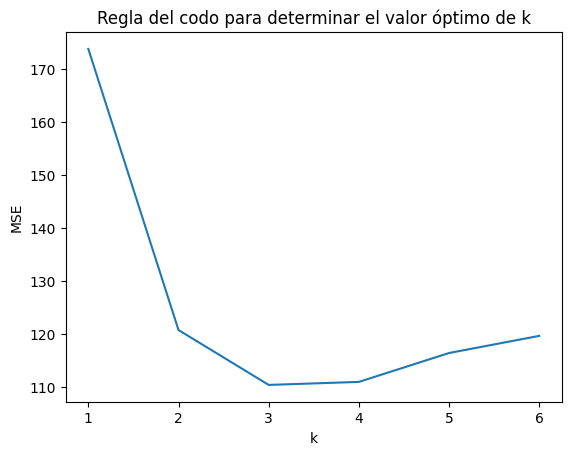

In [10]:
# Creamos dos dataframes basados en la presencia de Age
df_encoded['Age'] = df['Age']
df_with_age = df_encoded.dropna(subset=['Age']) #Un df solo con las entradas donde 'Age' no es nulo
df_without_age = df_encoded[df_encoded['Age'].isna()].drop(columns='Age') #un df con todos las entradas donde Age era nulo.

# Dividimos el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(df_with_age.drop(columns='Age'), df_with_age['Age'], test_size=0.2, random_state=357)

# Lista para almacenar los valores de MSE (Error Cuadrático Medio)
mse = []

# Rango de k para probar
k_range = range(1, 7)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Realizamos la validación cruzada para obtener una medida más robusta del error
    """  estamos tomando el negativo de los valores devueltos para obtener el MSE real. 
         Luego, añadimos la media de estos valores a nuestra lista de MSE para cada valor de k (mse.append(scores.mean())).
    """
    scores = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(scores.mean())
    print(f'scores = {scores}')
    
 
# Graficamos los valores 
plt.plot(k_range, mse)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Regla del codo para determinar el valor óptimo de k')
plt.show()


In [11]:
# Determinar el mejor valor de k 
best_k = k_range[mse.index(min(mse))]
print(f'Mejor número K: {best_k}')

# BUSCAR QUE SIGNIFICA QUE EL MEJOR K SEA 3

Mejor número K: 3


In [12]:
# Creamos el modelo KNN con el mejor valor de k
knn = KNeighborsRegressor(n_neighbors=best_k)

# Ajustamos el modelo a los datos sin valores nulos
knn.fit(X_train, y_train)

# Imputamos los valores faltantes en la columna 'Age'
imputed_ages = knn.predict(df_without_age)
df.loc[df['Age'].isna(), 'Age'] = imputed_ages

* Saber la edad mínima y máxima de las personas del barco.


In [13]:
minAge = round(df['Age'].min())
maxAge = df['Age'].max()
print(f'La edad mínima es: {minAge} \nLa edad máxima es: {maxAge}')

La edad mínima es: 0 
La edad máxima es: 80.0


* Conocer la mediana de las edades.


La mediana de la edad con los valores nulos sin corregir:  28.0
La mediana de la edad es sin valores nulos corregidos:  28.17


Text(0, 0.5, 'Edad')

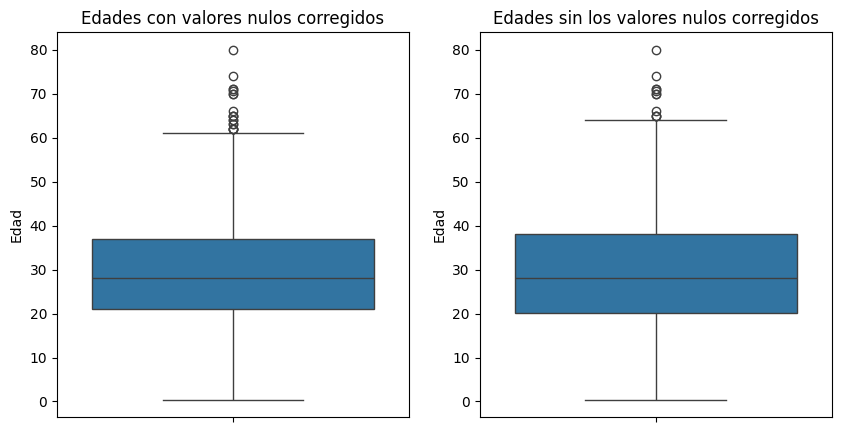

In [14]:
print('La mediana de la edad con los valores nulos sin corregir: ',datos['Age'].median())
print('La mediana de la edad es sin valores nulos corregidos: ',round(df['Age'].median(),2))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=df, y='Age', ax=axs[0])
sns.boxplot(data=datos['Age'], ax=axs[1])
axs[0].set_title('Edades con valores nulos corregidos')
axs[0].set_ylabel('Edad')
axs[1].set_title('Edades sin los valores nulos corregidos')
axs[1].set_ylabel('Edad')

* Porcentaje de filas con valores nulos después de corregir los NaN en 'Age'

In [15]:
# Porcentaje de filas con valores nulos.
filas = len(df)
filas_null = df.isnull().any(axis=1).sum()
filas_sin_null = filas - filas_null

porcentajes = pd.DataFrame({'Tipo': ['Filas con valores nulos', 'Filas sin valores nulos'],
                               'Cantidad': [filas_null, filas_sin_null]}) 


fig = px.pie(porcentajes, names='Tipo', values='Cantidad', title='Filas con al menos un valor nulo después de corregir "Age"',
             width= 700,
             color_discrete_sequence=px.colors.sequential.Blues_r
             )
fig.show()

* Ver los precios (columna `Fare`) más altos y bajos.


In [16]:
# Revertiremos la estandarización que se había hecho a la columna Fare:
df['Fare'] = datos['Fare'] #Tomamos los datos originales del 'Fare' del dataframe inicial
print('La tarifa mínima era: ', df['Fare'].min())
print('La tarifa máxima era: ', df['Fare'].max())


La tarifa mínima era:  0.0
La tarifa máxima era:  512.3292


* Número de pasajeros embarcados (columna `Embarked`).


In [111]:
puerto = df['Embarked'].value_counts().reset_index()
px.bar(puerto, x='Embarked',y='count', labels={'Embarked':'Puerto','count':'Cantidad de pasajeros'},
       width=600, title= 'Cantidad de pasajeros embarcados en cada puerto')



* Ver la distribución de sexos en las personas embarcadas.

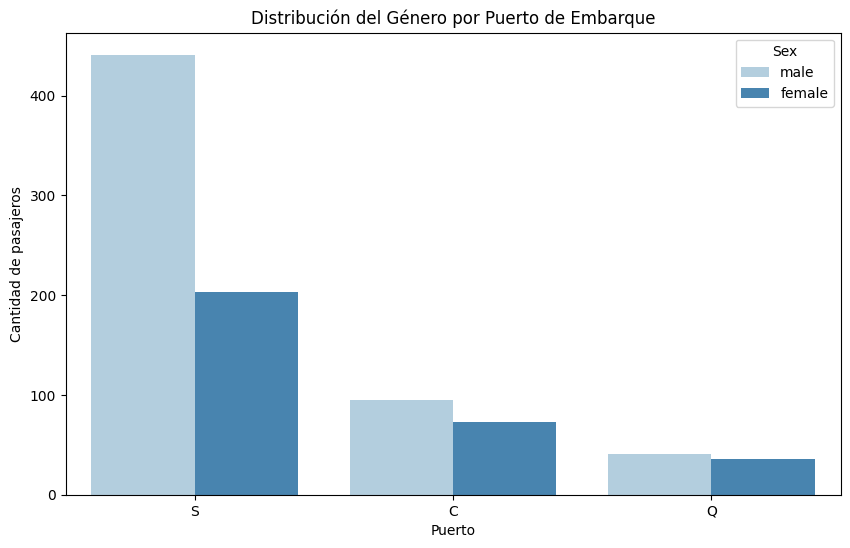

In [18]:
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Embarked', hue='Sex', data=df, palette='Blues')
plt.title('Distribución del Género por Puerto de Embarque')
plt.xlabel('Puerto')
plt.ylabel('Cantidad de pasajeros')
plt.show()

* Distribución de supervivientes por género

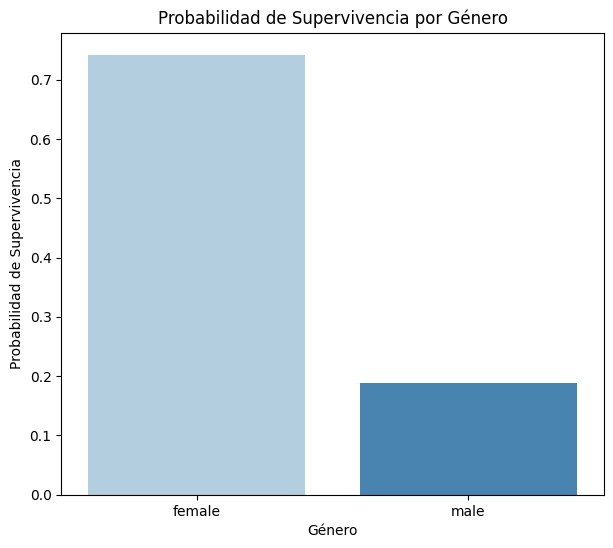

In [109]:
# Total de pasajeros por género
total_por_genero = df.groupby('Sex')['Survived'].count()

# Total de supervivientes por género
supervivientes_por_genero = df.groupby('Sex')['Survived'].sum()

# Probabilidad de supervivencia por género
probabilidad_genero = supervivientes_por_genero / total_por_genero
plt.figure(figsize=(7,6))
sns.barplot(x=probabilidad_genero.index, 
            y=probabilidad_genero.values, palette='Blues', 
            hue = probabilidad_genero.index, 
            legend= False)
plt.title("Probabilidad de Supervivencia por Género")
plt.xlabel("Género")
plt.ylabel("Probabilidad de Supervivencia")
plt.show()


* Cantidad de pasajeros por clase

Text(0, 0.5, 'Cantidad de pasajeros')

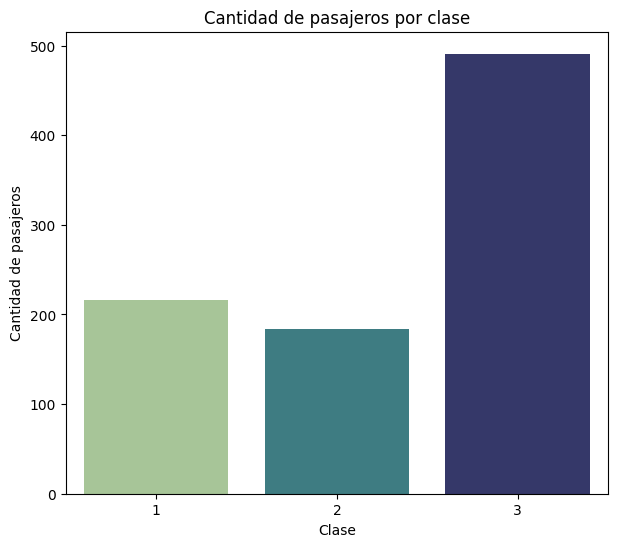

In [156]:
clases = df['Pclass'].value_counts().reset_index()
plt.figure(figsize=(7,6))
sns.barplot(data=clases, x ='Pclass', y='count', palette= 'crest',
            hue = 'Pclass',
            legend = False)
plt.title('Cantidad de pasajeros por clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de pasajeros')

* Distribución de supervivientes por clase


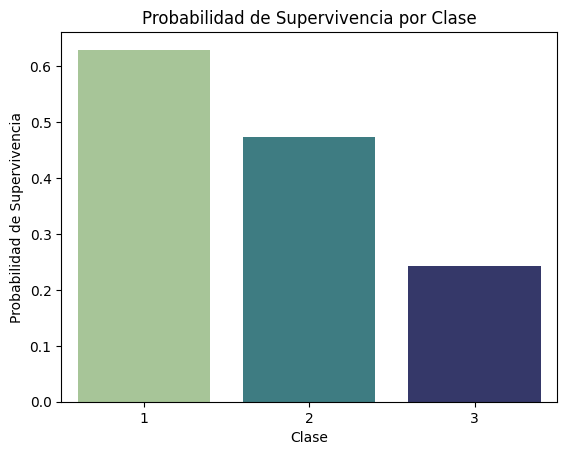

In [214]:
# Total de pasajeros por grupo de edad
total_por_clase = df.groupby('Pclass', observed=False)['Survived'].count()

# Total de supervivientes por grupo de edad
supervivientes_por_clase = df.groupby('Pclass', observed=False)['Survived'].sum()

# Probabilidad de supervivencia por grupo de edad
probabilidad_clase = supervivientes_por_clase / total_por_clase
sns.barplot(x=probabilidad_clase.index, y=probabilidad_clase.values, palette = 'crest',
            hue = probabilidad_clase.index, legend= False)
plt.title("Probabilidad de Supervivencia por Clase")
plt.xlabel("Clase")
plt.ylabel("Probabilidad de Supervivencia")
plt.show()


* Distribución de pasajeros por edad

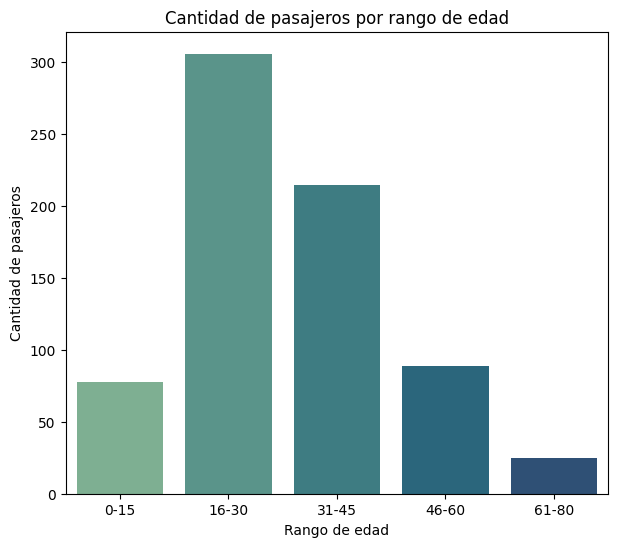

In [210]:
# Se crea una nueva columna con los rangos de edades elegidos.
bins = [0, 15, 30, 45, 60, 80]
labels = ['0-15', '16-30', '31-45', '46-60','61-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

#Representación gráfica de la distribución de los pasajeros por rango de edad.
plt.figure(figsize=(7,6))
sns.barplot(df['AgeGroup'].value_counts().reset_index(), x='AgeGroup', 
            y = 'count', palette= 'crest',
            hue = 'AgeGroup',
            legend = False)
plt.title('Cantidad de pasajeros por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de pasajeros')
plt.show()



* Probabilidad de supervivencia por rango de edad

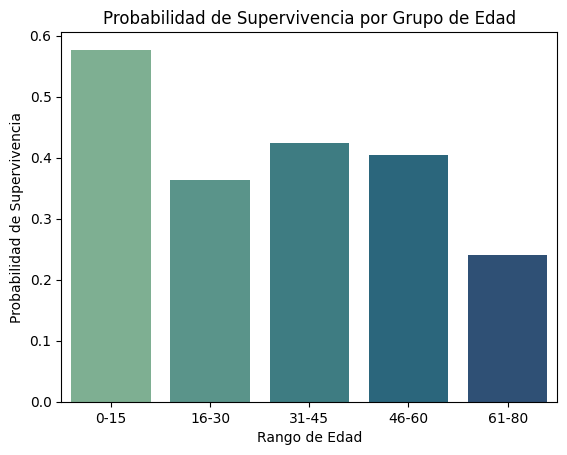

In [211]:
# Total de pasajeros por grupo de edad
total_por_edad = df.groupby('AgeGroup', observed=False)['Survived'].count()

# Total de supervivientes por grupo de edad
supervivientes_por_edad = df.groupby('AgeGroup', observed=False)['Survived'].sum()

# Probabilidad de supervivencia por grupo de edad
probabilidad_edad = supervivientes_por_edad / total_por_edad
sns.barplot(x=probabilidad_edad.index, y=probabilidad_edad.values, palette = 'crest',
            hue = probabilidad_edad.index, legend= False)
plt.title("Probabilidad de Supervivencia por Grupo de Edad")
plt.xlabel("Rango de Edad")
plt.ylabel("Probabilidad de Supervivencia")
plt.show()